# Medical Cost Personal Dataset

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
zip_file_path = 'Medical Cost Personal.zip'  # Update with the correct path
extracted_folder = 'Medical_Cost_Data/'  # Folder to extract the files

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

csv_file_path = extracted_folder + 'insurance.csv'  # Path to the CSV file
insurance_data = pd.read_csv(csv_file_path)

print("First few rows of the dataset:")
print(insurance_data.head())

# Print the column names to check for correct loading
print("\nColumns in the dataset:")
print(insurance_data.columns)

# Check for missing values
print("\nMissing values in the dataset:")
print(insurance_data.isnull().sum())

# Data Summary - Get the summary statistics of the dataset
print("\nData Summary:")
print(insurance_data.describe())

First few rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Columns in the dataset:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Missing values in the dataset:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Summary:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000 

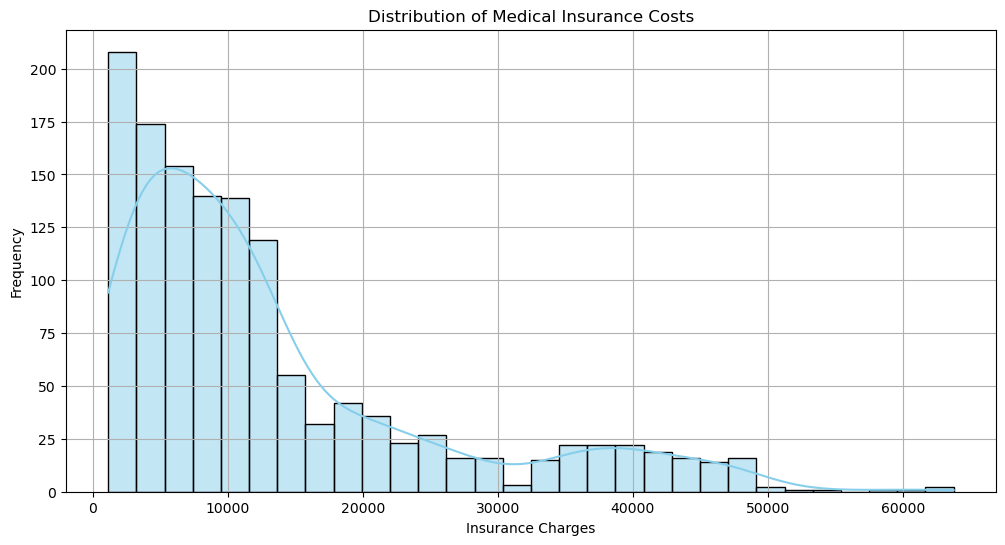

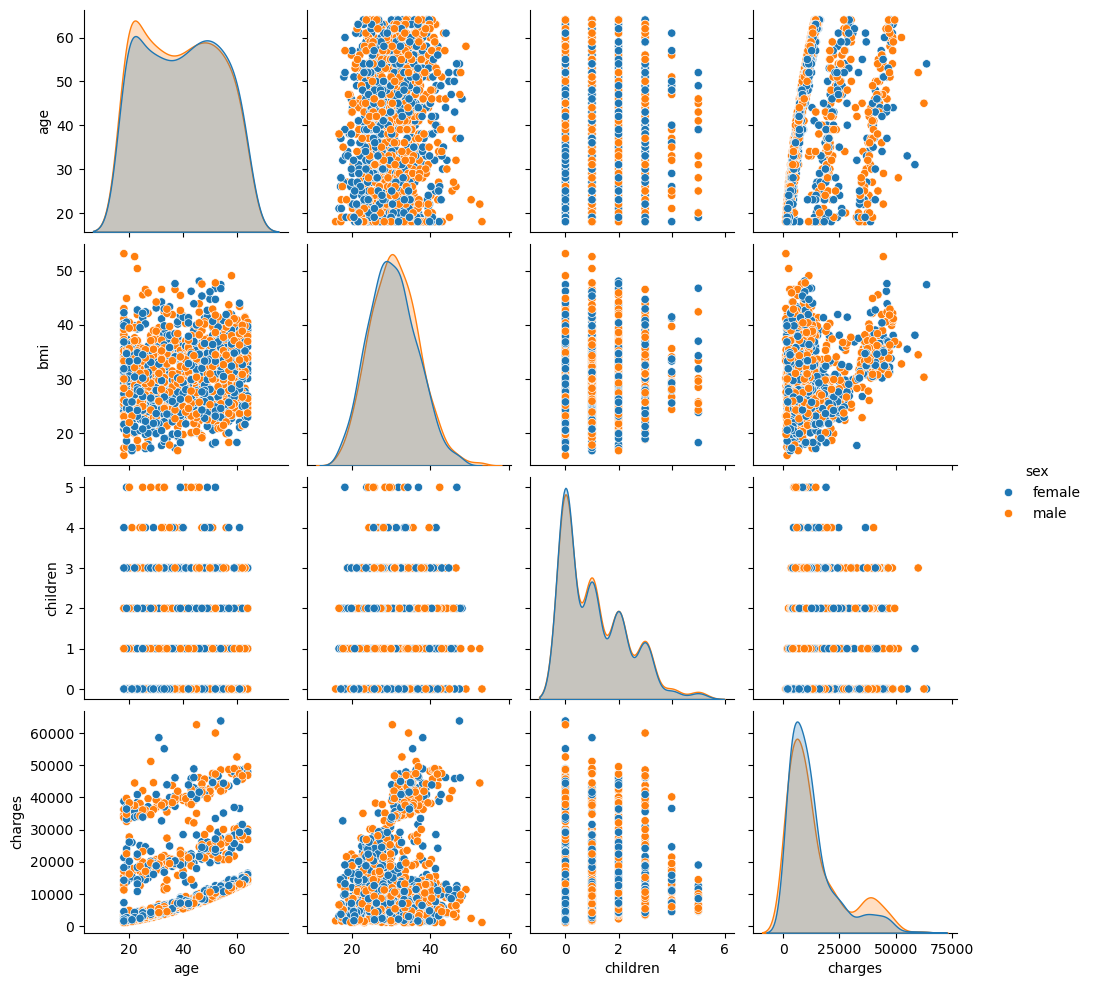

C:\Users\milto\AppData\Local\Temp\ipykernel_3796\296888611.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=insurance_data, x='smoker', y='charges', palette='Set2')


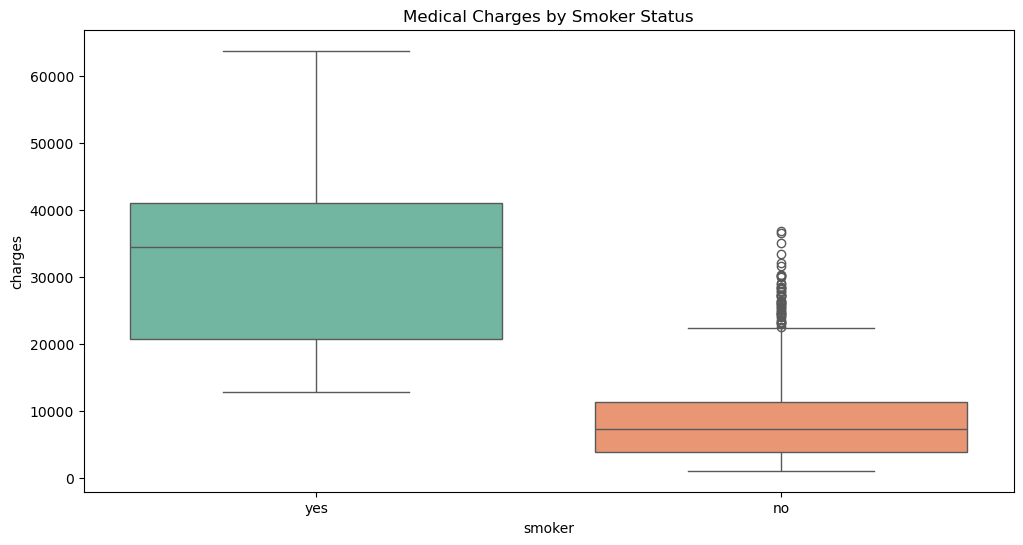

C:\Users\milto\AppData\Local\Temp\ipykernel_3796\296888611.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=insurance_data, x='region', y='charges', palette='Set3')


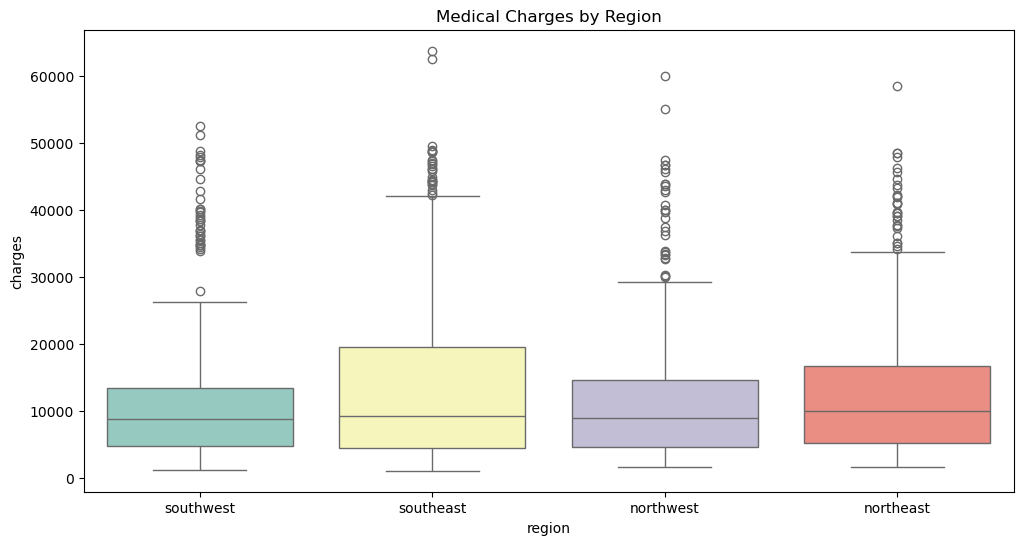

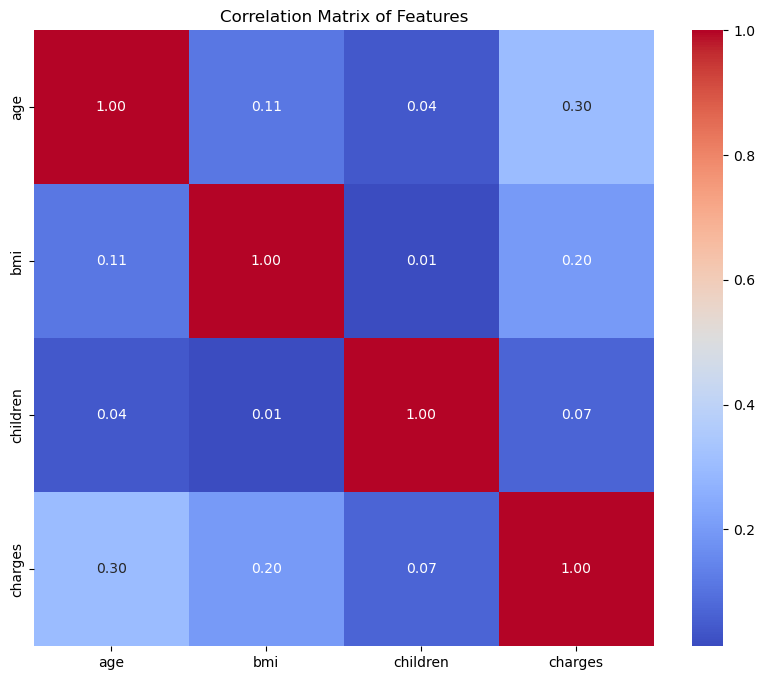

In [3]:
# Visualize the distribution of medical costs ('charges')
plt.figure(figsize=(12, 6))
sns.histplot(insurance_data['charges'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Medical Insurance Costs')
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualize the relationship between charges and other factors
# Pairplot for visualizing correlations between numerical features
sns.pairplot(insurance_data, vars=['age', 'bmi', 'children', 'charges'], hue='sex')
plt.show()

# Visualizing categorical features like region and smoker status
plt.figure(figsize=(12, 6))
sns.boxplot(data=insurance_data, x='smoker', y='charges', palette='Set2')
plt.title('Medical Charges by Smoker Status')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=insurance_data, x='region', y='charges', palette='Set3')
plt.title('Medical Charges by Region')
plt.show()

# Correlation between numeric features
# Select only numeric columns for correlation analysis
numeric_data = insurance_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()
